# Loading Dataset

In [1]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
dataset = pd.read_csv('datasetThesis.csv')
dataset

,Type,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,...,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
0,0,37,2,0,0,8,0,0,5,0,...,0,0,1,0,3,0,0,0,4.010412,2.751629
1,1,70,5,0,0,12,0,0,6,0,...,0,0,1,0,4,0,0,0,4.089470,3.532573
2,0,42,2,0,6,8,0,0,3,1,...,0,0,1,0,1,1,0,0,4.386016,3.344698
3,0,46,2,0,0,7,0,0,4,0,...,0,0,1,0,2,0,0,0,4.221947,3.189898
4,0,51,3,0,0,9,0,0,5,0,...,0,0,1,0,3,0,0,0,4.103538,2.952820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247945,0,42,1,0,0,6,0,0,4,0,...,0,0,1,0,2,0,0,0,3.758289,3.323231
247946,0,42,2,0,0,8,0,0,5,0,...,0,0,1,0,3,0,0,0,3.937093,3.026987
247947,1,33,2,0,0,8,0,0,5,0,...,0,0,1,0,3,0,0,0,3.813207,3.327820
247948,1,83,1,1,19,9,0,0,7,0,...,0,0,1,0,5,0,0,0,4.540173,3.375000


In [10]:
dataset.columns

Index(['Type', 'url_length', 'number_of_dots_in_url',
       'having_repeated_digits_in_url', 'number_of_digits_in_url',
       'number_of_special_char_in_url', 'number_of_hyphens_in_url',
       'number_of_underline_in_url', 'number_of_slash_in_url',
       'number_of_questionmark_in_url', 'number_of_equal_in_url',
       'number_of_at_in_url', 'number_of_dollar_in_url',
       'number_of_exclamation_in_url', 'number_of_hashtag_in_url',
       'number_of_percent_in_url', 'domain_length', 'number_of_dots_in_domain',
       'number_of_hyphens_in_domain', 'having_special_characters_in_domain',
       'number_of_special_characters_in_domain', 'having_digits_in_domain',
       'number_of_digits_in_domain', 'having_repeated_digits_in_domain',
       'number_of_subdomains', 'having_dot_in_subdomain',
       'having_hyphen_in_subdomain', 'average_subdomain_length',
       'average_number_of_dots_in_subdomain',
       'average_number_of_hyphens_in_subdomain',
       'having_special_characters_

In [4]:
dataset.describe()

,Type,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,...,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
count,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,...,247950.000000,247950.000000,247950.0,247950.0,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000
mean,0.481585,58.358197,2.894075,0.162351,4.366070,10.303218,0.600867,0.204049,4.784533,0.159911,...,0.064529,0.224013,1.0,0.0,2.606977,0.126501,0.002303,0.000944,4.257222,3.389839
std,0.499662,29.764620,1.690970,0.368773,9.579032,4.718381,1.235599,0.653502,1.812574,0.449506,...,0.245694,1.276447,0.0,0.0,1.636938,0.332414,0.047933,0.030706,0.328098,0.376361
min,0.000000,12.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,2.648939,1.386274
25%,0.000000,39.000000,2.000000,0.000000,0.000000,7.000000,0.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,1.0,0.0,2.000000,0.000000,0.000000,0.000000,4.038910,3.180833
50%,0.000000,49.000000,3.000000,0.000000,0.000000,9.000000,0.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,1.0,0.0,2.000000,0.000000,0.000000,0.000000,4.208298,3.392747
75%,1.000000,69.000000,3.000000,0.000000,4.000000,11.000000,1.000000,0.000000,5.000000,0.000000,...,0.000000,0.000000,1.0,0.0,3.000000,0.000000,0.000000,0.000000,4.428036,3.606937
max,1.000000,191.000000,28.000000,1.000000,144.000000,75.000000,23.000000,47.000000,30.000000,17.000000,...,1.000000,44.000000,1.0,0.0,28.000000,1.000000,1.000000,1.000000,5.866327,4.957323


# Feature Selection using Mutual Information

In [5]:
#Splitting the dataset into training and testing sets

X = dataset.drop(columns=['Type']) 
y = dataset['Type']

seed = 22

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

In [7]:
# Getting mutual information about features
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([1.57875090e-01, 7.75532681e-02, 1.42595402e-02, 8.93931948e-02,
       9.51553175e-02, 2.10639948e-02, 1.78116202e-03, 5.66217821e-02,
       4.41789244e-02, 5.03052724e-02, 4.95249743e-04, 6.66698533e-05,
       2.34658777e-03, 3.05805150e-03, 2.70112303e-03, 7.87456912e-02,
       7.77758533e-02, 2.45296667e-02, 1.04775176e-02, 1.27922825e-02,
       3.88271557e-02, 9.05971501e-02, 3.27676576e-02, 9.03373949e-02,
       1.21621940e-04, 0.00000000e+00, 1.01708500e-01, 8.13233565e-04,
       2.69926541e-04, 0.00000000e+00, 8.67267106e-05, 1.84617534e-02,
       2.20567266e-02, 1.63210432e-03, 2.27351233e-03, 2.98544902e-02,
       3.67575589e-02, 0.00000000e+00, 0.00000000e+00, 2.06521612e-01,
       1.49819951e-01])

In [8]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

entropy_of_url                               0.206522
url_length                                   0.157875
entropy_of_domain                            0.149820
average_subdomain_length                     0.101708
number_of_special_char_in_url                0.095155
number_of_digits_in_domain                   0.090597
number_of_subdomains                         0.090337
number_of_digits_in_url                      0.089393
domain_length                                0.078746
number_of_dots_in_domain                     0.077776
number_of_dots_in_url                        0.077553
number_of_slash_in_url                       0.056622
number_of_equal_in_url                       0.050305
number_of_questionmark_in_url                0.044179
having_digits_in_domain                      0.038827
having_query                                 0.036758
having_repeated_digits_in_domain             0.032768
path_length                                  0.029854
number_of_hyphens_in_domain 

<AxesSubplot:>

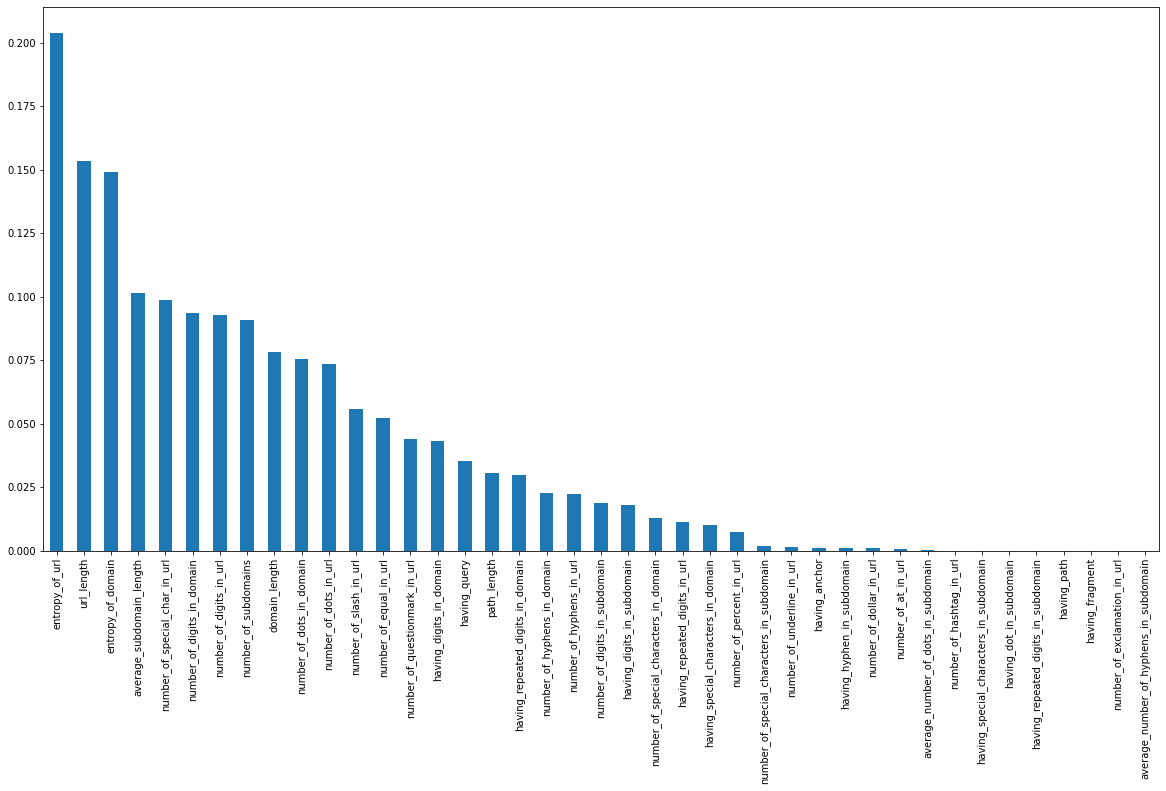

In [13]:
mutual_info.sort_values(ascending=False).plot.bar(figsize = (20,10))

In [12]:
X.head()

,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,number_of_equal_in_url,...,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
0,37,2,0,0,8,0,0,5,0,0,...,0,0,1,0,3,0,0,0,4.010412,2.751629
1,70,5,0,0,12,0,0,6,0,0,...,0,0,1,0,4,0,0,0,4.089470,3.532573
2,42,2,0,6,8,0,0,3,1,1,...,0,0,1,0,1,1,0,0,4.386016,3.344698
3,46,2,0,0,7,0,0,4,0,0,...,0,0,1,0,2,0,0,0,4.221947,3.189898
4,51,3,0,0,9,0,0,5,0,0,...,0,0,1,0,3,0,0,0,4.103538,2.952820


In [9]:
# Selecting the top 50% best features according to mutual information

ft = SelectPercentile(mutual_info_regression, percentile=50)
ft.fit(X_train, y_train)

SelectPercentile(percentile=50,
                 score_func=<function mutual_info_regression at 0x7fe960d124c0>)

In [10]:
ft_selected = X_train.columns[ft.get_support()]

In [19]:
ft_selected

Index(['url_length', 'number_of_dots_in_url', 'number_of_digits_in_url',
       'number_of_special_char_in_url', 'number_of_hyphens_in_url',
       'number_of_slash_in_url', 'number_of_questionmark_in_url',
       'number_of_equal_in_url', 'domain_length', 'number_of_dots_in_domain',
       'number_of_hyphens_in_domain', 'having_digits_in_domain',
       'number_of_digits_in_domain', 'having_repeated_digits_in_domain',
       'number_of_subdomains', 'average_subdomain_length', 'path_length',
       'having_query', 'entropy_of_url', 'entropy_of_domain'],
      dtype='object')

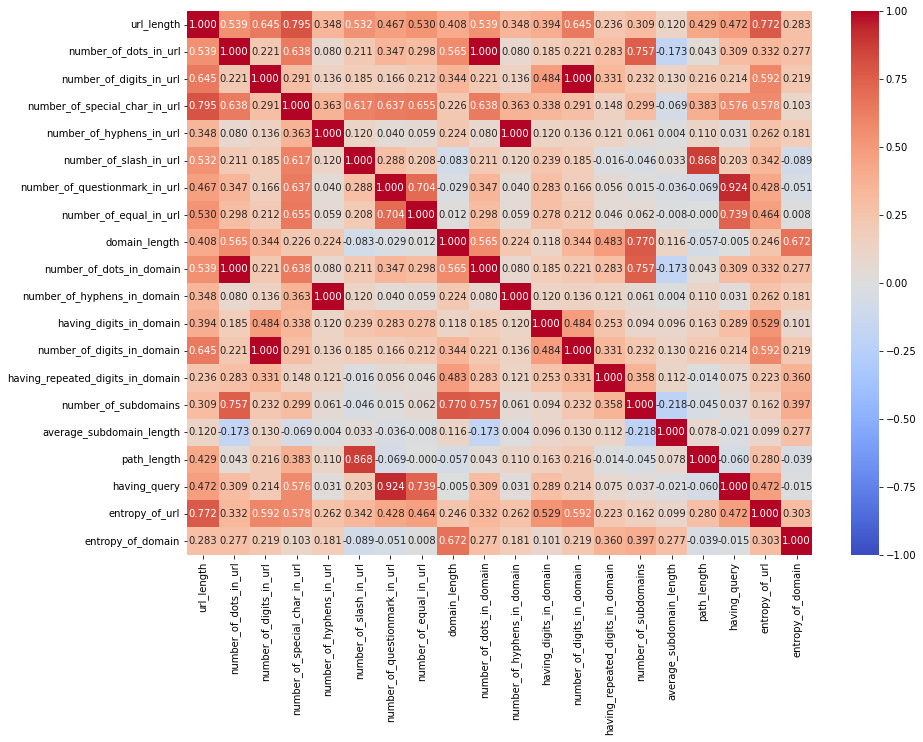

In [14]:
#Correlation heatmap
df = pd.DataFrame(dataset[ft_selected])

corr_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

# Random Forest hyperparameter tuning

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

In [50]:
rf = RandomForestClassifier()


rf = RandomForestClassifier(bootstrap=True)
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600],  
    'max_depth': [15, 20, 25, 30, 35], 
    'min_samples_split': [50, 100,200,300,500],  
    'min_samples_leaf': [1, 2, 4],  
}
start_time_rf = time.time()

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=200, cv=3, verbose=2, random_state=22, n_jobs=-1)
random_search.fit(X_train[ft_selected], y_train)

end_time_rf = time.time()
elapsed_time = end_time_rf - start_time_rf


print("Best Parameters:", random_search.best_params_)
print("Execution time:", elapsed_time, "seconds")



Fitting 3 folds for each of 200 candidates, totalling 600 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 50, 'min_samples_leaf': 1, 'max_depth': 35}
Execution time: 7125.880019903183 seconds


In [51]:
best_rf = random_search.best_estimator_
accuracy = best_rf.score(X_test[ft_selected], y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.920165355918532
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=100, n_estimators=600; total time= 2.7min
[CV] END max_depth=35, min_samples_leaf=4, min_samples_split=50, n_estimators=300; total time= 1.5min
[CV] END max_depth=25, min_samples_leaf=4, min_samples_split=500, n_estimators=200; total time=  49.5s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=100, n_estimators=500; total time= 2.4min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=50, n_estimators=500; total time= 2.3min
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=50, n_estimators=300; total time= 1.5min
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=50, n_estimators=400; total time= 1.6min
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=50, n_estimators=600; total time= 2.9min
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=300, n_estimators=500; total time= 2.0min
[CV] END max_depth=35, min_samples_leaf=1, mi

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=50, n_estimators=300; total time= 1.4min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=100, n_estimators=600; total time= 2.7min
[CV] END max_depth=25, min_samples_leaf=4, min_samples_split=500, n_estimators=200; total time=  49.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=100, n_estimators=500; total time= 2.4min
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=50, n_estimators=200; total time=  49.2s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=200, n_estimators=100; total time=  27.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=50, n_estimators=300; total time= 1.5min
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=500, n_estimators=100; total time=  25.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=200, n_estimators=200; total time=  47.2s
[CV] END max_depth=25, min_samples_leaf=4, min_samples_split=500, n_estimato

[CV] END max_depth=35, min_samples_leaf=4, min_samples_split=100, n_estimators=500; total time= 2.4min
[CV] END max_depth=35, min_samples_leaf=4, min_samples_split=500, n_estimators=600; total time= 2.5min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=100, n_estimators=500; total time= 2.2min
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=50, n_estimators=200; total time=  48.6s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=200, n_estimators=100; total time=  26.6s
[CV] END max_depth=35, min_samples_leaf=2, min_samples_split=300, n_estimators=400; total time= 1.8min
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=500, n_estimators=100; total time=  25.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=200, n_estimators=100; total time=  23.7s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=500, n_estimators=100; total time=  25.1s
[CV] END max_depth=25, min_samples_leaf=4, min_samples_split=500, n_estima

[CV] END max_depth=35, min_samples_leaf=4, min_samples_split=100, n_estimators=500; total time= 2.4min
[CV] END max_depth=35, min_samples_leaf=1, min_samples_split=200, n_estimators=400; total time= 1.8min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=100, n_estimators=500; total time= 2.2min
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=100, n_estimators=500; total time= 2.0min
[CV] END max_depth=35, min_samples_leaf=2, min_samples_split=300, n_estimators=400; total time= 1.8min
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=200, n_estimators=200; total time=  47.3s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=500, n_estimators=100; total time=  25.3s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=50, n_estimators=600; total time= 3.0min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=300, n_estimators=400; total time= 1.7min
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=300, n_estima

Accuracy: 0.960294
Precision: 0.969201
Recall: 0.947970
F1 Score: 0.958468


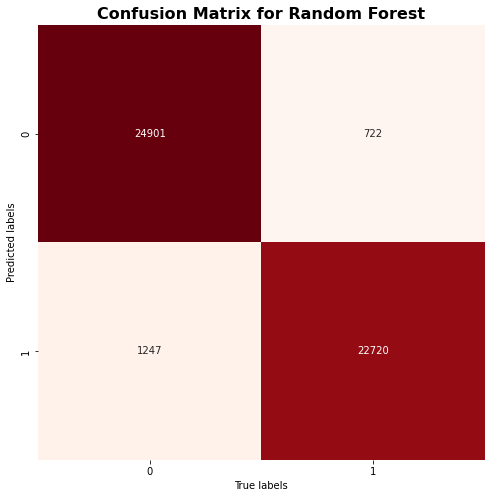

False Positive Percentage: 4.769007%
False Negative Percentage: 3.079942%
True Positive Percentage: 96.920058%
True Negative Percentage: 95.230993%


In [12]:
# Calculation of important metrics for random forest

accuracy = accuracy_score(y_test, y_pred_rf_test1)
precision = precision_score(y_test, y_pred_rf_test1)
recall = recall_score(y_test, y_pred_rf_test1)
f1 = f1_score(y_test, y_pred_rf_test1)
 

print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1 Score: {:.6f}".format(f1))

cm_rf = confusion_matrix(y_test, y_pred_rf_test1)
plt.figure(figsize=(8, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.title('Confusion Matrix for Random Forest', fontsize=16, fontweight='bold')
plt.show()

# Getting values for TNs, TPs, FNs, FPs
tn, fn, fp, tp = cm_rf.ravel()

false_positive_percentage = (fp / (fp+tn)) * 100
false_negative_percentage = (fn / (fn+tp)) * 100
true_positive_percentage = (tp / (fn+tp)) * 100
true_negative_percentage = (tn / (tn+fp)) * 100

print("False Positive Percentage: {:.6f}%".format(false_positive_percentage))
print("False Negative Percentage: {:.6f}%".format(false_negative_percentage))
print("True Positive Percentage: {:.6f}%".format(true_positive_percentage))
print("True Negative Percentage: {:.6f}%".format(true_negative_percentage))


In [9]:
new_ft_selected = ['url_length', 'number_of_dots_in_url', 'number_of_digits_in_url', 'number_of_special_char_in_url', 'number_of_slash_in_url','number_of_questionmark_in_url', 'number_of_equal_in_url', 'domain_length', 'having_digits_in_domain', 'having_repeated_digits_in_domain', 'number_of_subdomains', 'average_subdomain_length','number_of_digits_in_subdomain', 'path_length', 'entropy_of_url', 'entropy_of_domain']

        
rf_test1 =RandomForestClassifier(n_estimators=700, max_depth=35, min_samples_split=5, min_samples_leaf=1, random_state=2, bootstrap = True)
rf_test1.fit(X_train[new_ft_selected],y_train)
y_pred_rf_test1 = rf_test1.predict(X_test[new_ft_selected])
accuracy = accuracy_score(y_test, y_pred_rf_test1)
print("Accuracy:", accuracy)

Accuracy: 0.9602944141964106


# Logistic Regression hyperparameter tuning

In [63]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

param_grid_lr = {
    'penalty': ['l1', 'l2'],       
    'C' : np.logspace(-4, 4, 30),  
    'solver': ['saga', 'liblinear'],
    'max_iter': [1000],
    
}
start_time_lr = time.time()

random_search_lr = RandomizedSearchCV(estimator=lr, param_distributions=param_grid_lr, n_iter=120, cv=3, verbose=2, random_state=23, n_jobs=-1)
random_search_lr.fit(X_train[ft_selected], y_train)

end_time_lr = time.time()
elapsed_time_lr = end_time_lr - start_time_lr

print("Best Parameters:", random_search_lr.best_params_)
print("Execution time:", elapsed_time_lr, "seconds")

In [96]:
print("Best Parameters:", random_search_lr.best_params_)
print("Execution time:", elapsed_time_lr, "seconds")

best_lr = random_search_lr.best_estimator_
accuracy = best_lr.score(X_test[ft_selected], y_test)
print("Test Accuracy:", accuracy)

Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1000, 'C': 32.90344562312671}
Execution time: 2200.8022108078003 seconds
Test Accuracy: 0.7967533776971164
[CV] END ...C=0.0001, max_iter=1000, penalty=l1, solver=saga; total time=  17.7s
[CV] END C=0.00018873918221350977, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.3s
[CV] END C=0.00018873918221350977, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.5s
[CV] END C=0.00018873918221350977, max_iter=1000, penalty=l2, solver=saga; total time= 1.4min
[CV] END C=0.0006723357536499335, max_iter=1000, penalty=l1, solver=saga; total time= 1.0min
[CV] END C=0.0006723357536499335, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.3s
[CV] END C=0.0012689610031679222, max_iter=1000, penalty=l1, solver=saga; total time= 1.6min
[CV] END C=0.002395026619987486, max_iter=1000, penalty=l2, solver=saga; total time= 1.4min
[CV] END C=0.004520353656360241, max_iter=1000, penalty=l2, solver=saga; t

[CV] END ...C=0.0001, max_iter=1000, penalty=l1, solver=saga; total time=  17.7s
[CV] END C=0.00018873918221350977, max_iter=1000, penalty=l1, solver=saga; total time=  24.6s
[CV] END C=0.0003562247890262444, max_iter=1000, penalty=l1, solver=saga; total time=  44.0s
[CV] END C=0.0003562247890262444, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.2s
[CV] END C=0.0003562247890262444, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.1s
[CV] END C=0.0003562247890262444, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.0s
[CV] END C=0.0006723357536499335, max_iter=1000, penalty=l1, solver=saga; total time= 1.0min
[CV] END C=0.0006723357536499335, max_iter=1000, penalty=l2, solver=saga; total time= 1.4min
[CV] END C=0.002395026619987486, max_iter=1000, penalty=l1, solver=saga; total time= 1.6min
[CV] END C=0.004520353656360241, max_iter=1000, penalty=l1, solver=liblinear; total time=   6.2s
[CV] END C=0.004520353656360241, max_iter=1000, penalty=l1, sol

Accuracy: 0.796753
Precision: 0.837546
Recall: 0.718905
F1 Score: 0.773704
Execution time: 2200.8022108078003 seconds


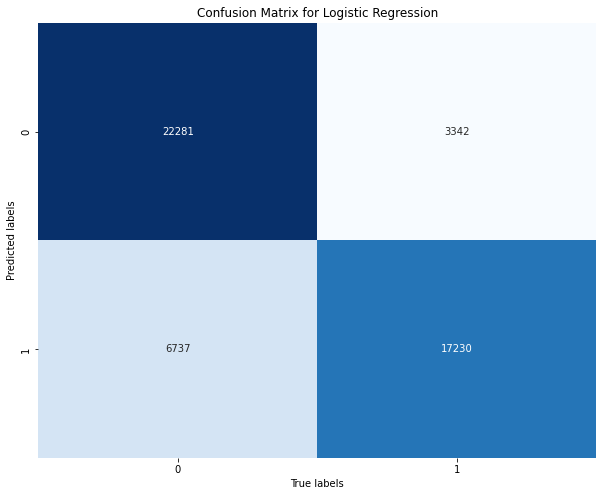

False Positive Percentage: 23.216624%
False Negative Percentage: 16.245382%
True Positive Percentage: 83.754618%
True Negative Percentage: 76.783376%


In [112]:
# Calculation of important metrics for Logistic Regression
y_pred_lr = best_lr.predict(X_test[ft_selected])

accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)


print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1 Score: {:.6f}".format(f1))
print("Execution time:", elapsed_time_lr, "seconds")

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 8))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Getting values for TNs, TPs, FNs, FPs
tn, fn, fp, tp = cm_lr.ravel()

false_positive_percentage = (fp / (fp+tn)) * 100
false_negative_percentage = (fn / (fn+tp)) * 100
true_positive_percentage = (tp / (fn+tp)) * 100
true_negative_percentage = (tn / (tn+fp)) * 100

print("False Positive Percentage: {:.6f}%".format(false_positive_percentage))
print("False Negative Percentage: {:.6f}%".format(false_negative_percentage))
print("True Positive Percentage: {:.6f}%".format(true_positive_percentage))
print("True Negative Percentage: {:.6f}%".format(true_negative_percentage))


# PassiveAggressive model hyperparameter tuning

In [99]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [107]:
pa = PassiveAggressiveClassifier()

param_grid_pa = {
    'C' : np.logspace(-7, 7, 50),  
    'max_iter': [400, 600, 800, 1000, 1200, 1400],
    'tol': [1e-3, 1e-4, 1e-5, 1e-6],
    
}
start_time_pa = time.time()

random_search_pa = RandomizedSearchCV(estimator=pa, param_distributions=param_grid_pa, n_iter=300, cv=3, verbose=2, random_state=24, n_jobs=-1)
random_search_pa.fit(X_train[ft_selected], y_train)

end_time_pa = time.time()
elapsed_time_pa = end_time_pa - start_time_pa

print("Best Parameters:", random_search_pa.best_params_)
print("Execution time:", elapsed_time_pa, "seconds")

Fitting 3 folds for each of 300 candidates, totalling 900 fits


/Users/mitkodimitrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/mitkodimitrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/mitkodimitrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/mitkodimitrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_grad

[CV] END ...C=0.38566204211634725, max_iter=1000, tol=0.0001; total time=   1.4s
[CV] END ..C=0.00018873918221350977, max_iter=600, tol=0.001; total time=   0.4s
[CV] END ......C=9.236708571873866, max_iter=1000, tol=0.001; total time=   0.4s
[CV] END .....C=9.236708571873866, max_iter=1000, tol=0.0001; total time=   0.4s
[CV] END .......C=0.7278953843983146, max_iter=400, tol=0.01; total time=   0.3s
[CV] END ...C=0.008531678524172805, max_iter=1200, tol=0.001; total time=   0.4s
[CV] END ......C=0.38566204211634725, max_iter=800, tol=0.01; total time=   0.3s
[CV] END ......C=4.893900918477489, max_iter=600, tol=0.0001; total time=   0.7s
[CV] END ...................C=0.0001, max_iter=800, tol=0.01; total time=   0.4s
[CV] END ...C=0.002395026619987486, max_iter=1200, tol=0.001; total time=   0.3s
[CV] END .C=0.00018873918221350977, max_iter=1000, tol=0.001; total time=   0.5s
[CV] END ....C=0.002395026619987486, max_iter=1000, tol=0.01; total time=   0.3s
[CV] END ...C=0.000356224789

[CV] END ......C=0.1082636733874054, max_iter=600, tol=0.001; total time=   1.3s
[CV] END ..C=0.00018873918221350977, max_iter=600, tol=0.001; total time=   0.5s
[CV] END ........C=5298.316906283702, max_iter=800, tol=0.01; total time=   0.3s
[CV] END .......C=117.21022975334793, max_iter=600, tol=0.01; total time=   0.3s
[CV] END ......C=0.05736152510448681, max_iter=600, tol=0.01; total time=   0.3s
[CV] END .....C=117.21022975334793, max_iter=600, tol=0.0001; total time=   0.8s
[CV] END ......C=0.38566204211634725, max_iter=800, tol=0.01; total time=   0.3s
[CV] END ...C=0.002395026619987486, max_iter=400, tol=0.0001; total time=   0.6s
[CV] END .......C=417.53189365604004, max_iter=400, tol=0.01; total time=   0.4s
[CV] END ...C=0.002395026619987486, max_iter=1200, tol=0.001; total time=   0.4s
[CV] END .C=0.00018873918221350977, max_iter=1000, tol=0.001; total time=   0.4s
[CV] END ....C=0.002395026619987486, max_iter=1000, tol=0.01; total time=   0.3s
[CV] END ....C=17.4332882219

[CV] END ........C=62.10169418915616, max_iter=600, tol=0.01; total time=   1.1s
[CV] END .....C=417.53189365604004, max_iter=800, tol=0.0001; total time=   0.8s
[CV] END ......C=62.10169418915616, max_iter=1200, tol=0.001; total time=   0.5s
[CV] END .....C=9.236708571873866, max_iter=1000, tol=0.0001; total time=   0.4s
[CV] END .......C=62.10169418915616, max_iter=400, tol=0.001; total time=   0.5s
[CV] END ...C=0.008531678524172805, max_iter=1200, tol=0.001; total time=   0.5s
[CV] END .....C=1.3738237958832638, max_iter=1200, tol=0.001; total time=   0.4s
[CV] END .....C=5298.316906283702, max_iter=1000, tol=0.0001; total time=   0.7s
[CV] END ...................C=0.0001, max_iter=800, tol=0.01; total time=   0.3s
[CV] END ......C=62.10169418915616, max_iter=400, tol=0.0001; total time=   0.6s
[CV] END .....C=1487.3521072935118, max_iter=1000, tol=0.001; total time=   0.4s
[CV] END ....C=17.433288221999874, max_iter=1000, tol=0.0001; total time=   0.7s
[CV] END ..C=0.0085316785241

[CV] END ......C=0.1082636733874054, max_iter=600, tol=0.001; total time=   1.3s
[CV] END ..C=0.00018873918221350977, max_iter=600, tol=0.001; total time=   0.5s
[CV] END ........C=5298.316906283702, max_iter=800, tol=0.01; total time=   0.3s
[CV] END .......C=117.21022975334793, max_iter=600, tol=0.01; total time=   0.3s
[CV] END ......C=0.05736152510448681, max_iter=600, tol=0.01; total time=   0.3s
[CV] END .....C=117.21022975334793, max_iter=600, tol=0.0001; total time=   0.6s
[CV] END ......C=0.38566204211634725, max_iter=800, tol=0.01; total time=   0.3s
[CV] END ......C=4.893900918477489, max_iter=600, tol=0.0001; total time=   0.7s
[CV] END .......C=417.53189365604004, max_iter=400, tol=0.01; total time=   0.4s
[CV] END .....C=0.008531678524172805, max_iter=400, tol=0.01; total time=   0.3s
[CV] END ......C=62.10169418915616, max_iter=400, tol=0.0001; total time=   0.6s
[CV] END .....C=1487.3521072935118, max_iter=1000, tol=0.001; total time=   0.3s
[CV] END .....C=0.0045203536

[CV] END ........C=62.10169418915616, max_iter=600, tol=0.01; total time=   0.9s
[CV] END ......C=0.1082636733874054, max_iter=600, tol=0.001; total time=   0.6s
[CV] END ......C=0.7278953843983146, max_iter=1000, tol=0.01; total time=   0.3s
[CV] END ......C=62.10169418915616, max_iter=1200, tol=0.001; total time=   0.4s
[CV] END ......C=0.05736152510448681, max_iter=600, tol=0.01; total time=   0.3s
[CV] END .......C=0.7278953843983146, max_iter=400, tol=0.01; total time=   0.3s
[CV] END ....C=1.3738237958832638, max_iter=1200, tol=0.0001; total time=   0.5s
[CV] END ......C=4.893900918477489, max_iter=600, tol=0.0001; total time=   0.8s
[CV] END .....C=5298.316906283702, max_iter=1000, tol=0.0001; total time=   0.5s
[CV] END .....C=0.008531678524172805, max_iter=400, tol=0.01; total time=   0.2s
[CV] END .....C=417.53189365604004, max_iter=1000, tol=0.001; total time=   0.7s
[CV] END ....C=0.002395026619987486, max_iter=1000, tol=0.01; total time=   0.3s
[CV] END ...C=0.000356224789

Best Parameters: {'tol': 1e-05, 'max_iter': 1200, 'C': 7.196856730011514e-05}
Execution time: 209.97114992141724 seconds


In [108]:
best_pa = random_search_pa.best_estimator_
accuracy = best_pa.score(X_test[ft_selected], y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.786428715466828


Accuracy: 0.786429
Precision: 0.842974
Recall: 0.685860
F1 Score: 0.756344
Execution time: 209.97114992141724 seconds


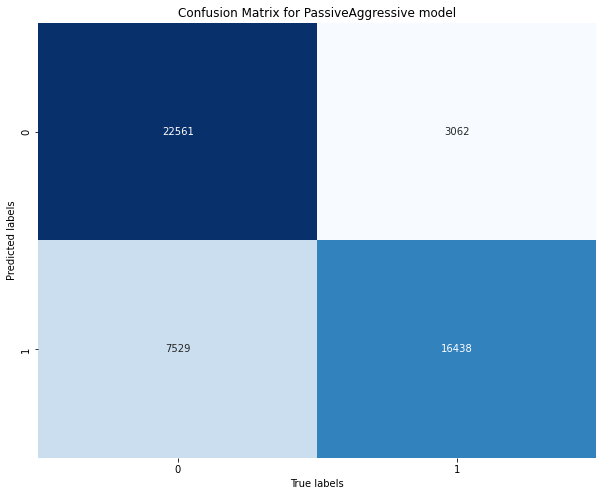

False Positive Percentage: 25.021602%
False Negative Percentage: 15.702564%
True Positive Percentage: 84.297436%
True Negative Percentage: 74.978398%


In [111]:
# Calculation of important metrics for PassiveAggressive model
y_pred_pa = best_pa.predict(X_test[ft_selected])

accuracy = accuracy_score(y_test, y_pred_pa)
precision = precision_score(y_test, y_pred_pa)
recall = recall_score(y_test, y_pred_pa)
f1 = f1_score(y_test, y_pred_pa)


print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1 Score: {:.6f}".format(f1))
print("Execution time:", elapsed_time_pa, "seconds")

cm_pa = confusion_matrix(y_test, y_pred_pa)
plt.figure(figsize=(8, 8))
sns.heatmap(cm_pa, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.title('Confusion Matrix for PassiveAggressive model')
plt.show()

# Getting values for TNs, TPs, FNs, FPs
tn, fn, fp, tp = cm_pa.ravel()

false_positive_percentage = (fp / (fp+tn)) * 100
false_negative_percentage = (fn / (fn+tp)) * 100
true_positive_percentage = (tp / (fn+tp)) * 100
true_negative_percentage = (tn / (tn+fp)) * 100

print("False Positive Percentage: {:.6f}%".format(false_positive_percentage))
print("False Negative Percentage: {:.6f}%".format(false_negative_percentage))
print("True Positive Percentage: {:.6f}%".format(true_positive_percentage))
print("True Negative Percentage: {:.6f}%".format(true_negative_percentage))


# Decision Tree Hyperparameter tuning

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
dt = DecisionTreeClassifier()

param_grid_dt = {
    'max_depth': [15, 20, 25, 30, 35, 40],  
    'min_samples_split': [15, 20 ,25, 50, 100],  
    'min_samples_leaf': [1, 2, 4], 
}
start_time_dt = time.time()

random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=param_grid_dt, n_iter=200, cv=3, verbose=0, random_state=25, n_jobs=-1)
random_search_dt.fit(X_train[ft_selected], y_train)

end_time_dt = time.time()
elapsed_time_dt = end_time_dt - start_time_dt


print("Best Parameters:", random_search_dt.best_params_)
print("Execution time:", elapsed_time_dt, "seconds")

best_dt = random_search_dt.best_estimator_
accuracy = best_dt.score(X_test[ft_selected], y_test)
print("Test Accuracy:", accuracy)

/Users/mitkodimitrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 90 is smaller than n_iter=200. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 40}
Execution time: 52.00302290916443 seconds
Test Accuracy: 0.924339584593668


Accuracy: 0.950071
Precision: 0.954451
Recall: 0.941628
F1 Score: 0.947996


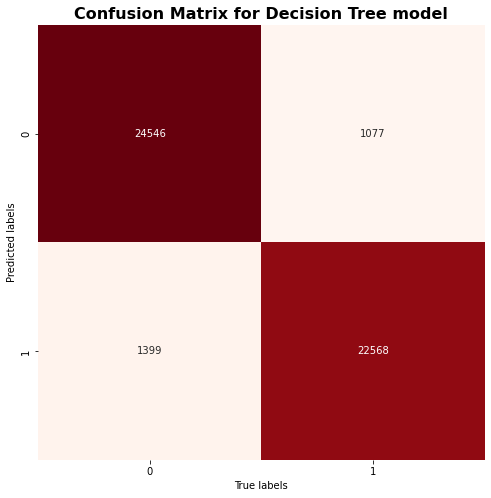

False Positive Percentage: 5.392176%
False Negative Percentage: 4.554874%
True Positive Percentage: 95.445126%
True Negative Percentage: 94.607824%


In [17]:
# Calculation of important metrics for Decision Tree model

accuracy = accuracy_score(y_test, y_pred_dt_test1)
precision = precision_score(y_test, y_pred_dt_test1)
recall = recall_score(y_test, y_pred_dt_test1)
f1 = f1_score(y_test, y_pred_dt_test1)


print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1 Score: {:.6f}".format(f1))

cm_dt = confusion_matrix(y_test, y_pred_dt_test1)
plt.figure(figsize=(8, 8))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.title('Confusion Matrix for Decision Tree model', fontsize=16, fontweight='bold')
plt.show()

# Getting values for TNs, TPs, FNs, FPs
tn, fn, fp, tp = cm_dt.ravel()

false_positive_percentage = (fp / (fp+tn)) * 100
false_negative_percentage = (fn / (fn+tp)) * 100
true_positive_percentage = (tp / (fn+tp)) * 100
true_negative_percentage = (tn / (tn+fp)) * 100

print("False Positive Percentage: {:.6f}%".format(false_positive_percentage))
print("False Negative Percentage: {:.6f}%".format(false_negative_percentage))
print("True Positive Percentage: {:.6f}%".format(true_positive_percentage))
print("True Negative Percentage: {:.6f}%".format(true_negative_percentage))


In [24]:
new_ft_selected = ['url_length', 'number_of_dots_in_url', 'number_of_digits_in_url', 'number_of_special_char_in_url', 'number_of_slash_in_url','number_of_questionmark_in_url', 'number_of_equal_in_url', 'domain_length', 'having_digits_in_domain', 'having_repeated_digits_in_domain', 'number_of_subdomains', 'average_subdomain_length','number_of_digits_in_subdomain', 'path_length', 'entropy_of_url', 'entropy_of_domain']

        
dt_test1 = DecisionTreeClassifier(min_samples_split=3, min_samples_leaf=1, max_depth=50, random_state=66)
dt_test1.fit(X_train[new_ft_selected],y_train)
y_pred_dt_test1 = dt_test1.predict(X_test[new_ft_selected])
accuracy = accuracy_score(y_test, y_pred_dt_test1)
print("Accuracy:", accuracy)

Accuracy: 0.9500705787457149


# Adaboost hyperparameter tuning

In [132]:
from sklearn.ensemble import AdaBoostClassifier

In [133]:
ada = AdaBoostClassifier()

param_grid_ada = {
    'n_estimators': [100,200,300,400,500], 
    'learning_rate': np.logspace(-5, 0, 100), 
    'algorithm': ['SAMME', 'SAMME.R'], 
}
start_time_ada = time.time()

random_search_ada = RandomizedSearchCV(estimator=ada, param_distributions=param_grid_ada, n_iter=200, cv=3, verbose=0, random_state=26, n_jobs=-1)
random_search_ada.fit(X_train[ft_selected], y_train)

end_time_ada = time.time()
elapsed_time_ada = end_time_ada - start_time_ada


print("Best Parameters:", random_search_ada.best_params_)
print("Execution time:", elapsed_time_ada, "seconds")

best_ada = random_search_ada.best_estimator_
accuracy = best_ada.score(X_test[ft_selected], y_test)
print("Test Accuracy:", accuracy)

Best Parameters: {'n_estimators': 500, 'learning_rate': 0.8902150854450392, 'algorithm': 'SAMME.R'}
Execution time: 4167.612133979797 seconds
Test Accuracy: 0.8525105868118572


Accuracy: 0.852511
Precision: 0.879772
Recall: 0.804815
F1 Score: 0.840626
Execution time: 4167.612133979797 seconds


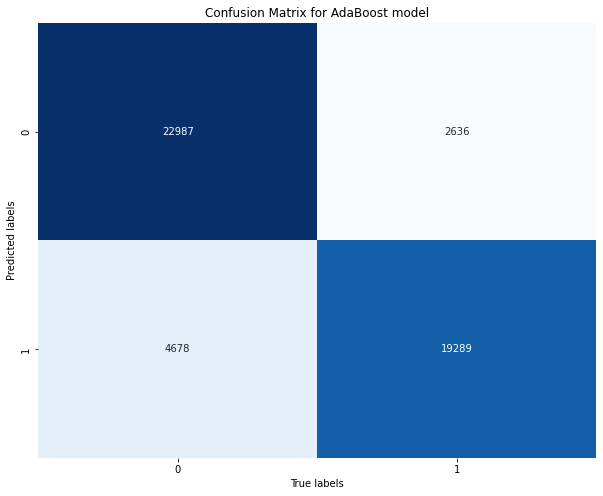

False Positive Percentage: 16.909452%
False Negative Percentage: 12.022805%
True Positive Percentage: 87.977195%
True Negative Percentage: 83.090548%


In [139]:
# Calculation of important metrics for AdaBoost model
y_pred_ada = best_ada.predict(X_test[ft_selected])

accuracy = accuracy_score(y_test, y_pred_ada)
precision = precision_score(y_test, y_pred_ada)
recall = recall_score(y_test, y_pred_ada)
f1 = f1_score(y_test, y_pred_ada)


print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1 Score: {:.6f}".format(f1))
print("Execution time:", elapsed_time_ada, "seconds")

cm_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8, 8))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.title('Confusion Matrix for AdaBoost model')
plt.show()

# Getting values for TNs, TPs, FNs, FPs
tn, fn, fp, tp = cm_ada.ravel()

false_positive_percentage = (fp / (fp+tn)) * 100
false_negative_percentage = (fn / (fn+tp)) * 100
true_positive_percentage = (tp / (fn+tp)) * 100
true_negative_percentage = (tn / (tn+fp)) * 100

print("False Positive Percentage: {:.6f}%".format(false_positive_percentage))
print("False Negative Percentage: {:.6f}%".format(false_negative_percentage))
print("True Positive Percentage: {:.6f}%".format(true_positive_percentage))
print("True Negative Percentage: {:.6f}%".format(true_negative_percentage))


# Multinomial Naive Bayes hyperparameter tuning

In [135]:
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import uniform, loguniform

In [136]:
mnb = MultinomialNB()

param_grid_mnb = {
    'alpha': loguniform(1e-4, 1e0)
}

start_time_mnb = time.time()

random_search_mnb = RandomizedSearchCV(estimator=mnb, param_distributions=param_grid_mnb, n_iter=200, cv=3, verbose=0, random_state=27, n_jobs=-1)
random_search_mnb.fit(X_train[ft_selected], y_train)

end_time_mnb = time.time()
elapsed_time_mnb = end_time_mnb - start_time_mnb


print("Best Parameters:", random_search_mnb.best_params_)
print("Execution time:", elapsed_time_mnb, "seconds")

best_mnb = random_search_mnb.best_estimator_
accuracy = best_mnb.score(X_test[ft_selected], y_test)
print("Test Accuracy:", accuracy)

Best Parameters: {'alpha': 0.005045284282242597}
Execution time: 49.405587911605835 seconds
Test Accuracy: 0.6221818915103852


Accuracy: 0.622182
Precision: 0.677599
Recall: 0.416364
F1 Score: 0.515791
Execution time: 49.405587911605835 seconds


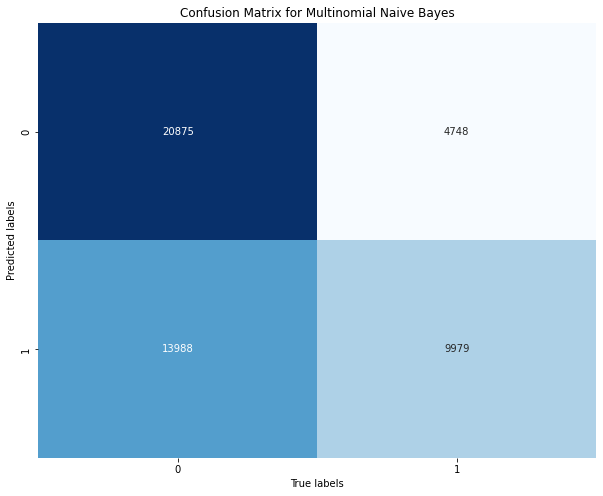

False Positive Percentage: 40.122766%
False Negative Percentage: 32.240103%
True Positive Percentage: 67.759897%
True Negative Percentage: 59.877234%


In [138]:
# Calculation of important metrics for MNB model
y_pred_mnb = best_mnb.predict(X_test[ft_selected])

accuracy = accuracy_score(y_test, y_pred_mnb)
precision = precision_score(y_test, y_pred_mnb)
recall = recall_score(y_test, y_pred_mnb)
f1 = f1_score(y_test, y_pred_mnb)


print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1 Score: {:.6f}".format(f1))
print("Execution time:", elapsed_time_mnb, "seconds")

cm_mnb = confusion_matrix(y_test, y_pred_mnb)
plt.figure(figsize=(8, 8))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.show()

# Getting values for TNs, TPs, FNs, FPs
tn, fn, fp, tp = cm_mnb.ravel()

false_positive_percentage = (fp / (fp+tn)) * 100
false_negative_percentage = (fn / (fn+tp)) * 100
true_positive_percentage = (tp / (fn+tp)) * 100
true_negative_percentage = (tn / (tn+fp)) * 100

print("False Positive Percentage: {:.6f}%".format(false_positive_percentage))
print("False Negative Percentage: {:.6f}%".format(false_negative_percentage))
print("True Positive Percentage: {:.6f}%".format(true_positive_percentage))
print("True Negative Percentage: {:.6f}%".format(true_negative_percentage))


# Bernoulli Naive Bayes hyperparameter tuning

In [58]:
from sklearn.naive_bayes import BernoulliNB

In [142]:
bnb = BernoulliNB()

param_grid_bnb = {
    'alpha': loguniform(1e-5, 1e0)
}

start_time_bnb = time.time()

random_search_bnb = RandomizedSearchCV(estimator=bnb, param_distributions=param_grid_bnb, n_iter=200, cv=3, verbose=0, random_state=28, n_jobs=-1)
random_search_bnb.fit(X_train[ft_selected], y_train)

end_time_bnb = time.time()
elapsed_time_bnb = end_time_bnb - start_time_bnb


print("Best Parameters:", random_search_bnb.best_params_)
print("Execution time:", elapsed_time_bnb, "seconds")

best_bnb = random_search_bnb.best_estimator_
accuracy = best_bnb.score(X_test[ft_selected], y_test)
print("Test Accuracy:", accuracy)

Best Parameters: {'alpha': 0.04416403154850551}
Execution time: 44.82560610771179 seconds
Test Accuracy: 0.6493042952208107


Accuracy: 0.649304
Precision: 0.635409
Recall: 0.643760
F1 Score: 0.639557
Execution time: 44.82560610771179 seconds


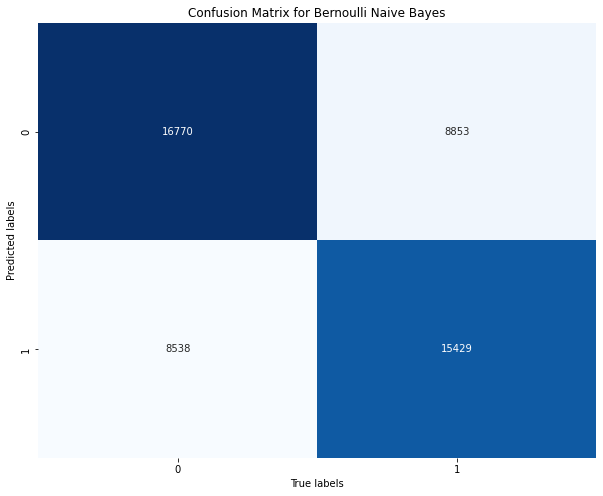

False Positive Percentage: 33.736368%
False Negative Percentage: 36.459106%
True Positive Percentage: 63.540894%
True Negative Percentage: 66.263632%


In [143]:
# Calculation of important metrics for BNB model
y_pred_bnb = best_bnb.predict(X_test[ft_selected])

accuracy = accuracy_score(y_test, y_pred_bnb)
precision = precision_score(y_test, y_pred_bnb)
recall = recall_score(y_test, y_pred_bnb)
f1 = f1_score(y_test, y_pred_bnb)


print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1 Score: {:.6f}".format(f1))
print("Execution time:", elapsed_time_bnb, "seconds")

cm_bnb = confusion_matrix(y_test, y_pred_bnb)
plt.figure(figsize=(8, 8))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.title('Confusion Matrix for Bernoulli Naive Bayes')
plt.show()

# Getting values for TNs, TPs, FNs, FPs
tn, fn, fp, tp = cm_bnb.ravel()

false_positive_percentage = (fp / (fp+tn)) * 100
false_negative_percentage = (fn / (fn+tp)) * 100
true_positive_percentage = (tp / (fn+tp)) * 100
true_negative_percentage = (tn / (tn+fp)) * 100

print("False Positive Percentage: {:.6f}%".format(false_positive_percentage))
print("False Negative Percentage: {:.6f}%".format(false_negative_percentage))
print("True Positive Percentage: {:.6f}%".format(true_positive_percentage))
print("True Negative Percentage: {:.6f}%".format(true_negative_percentage))


# Perceptron hyperparameter tuning

In [144]:
from sklearn.linear_model import Perceptron

In [161]:
per = Perceptron()

param_grid_per = {
    'alpha': np.linspace(0.01, 3, 50),
    'max_iter': [100, 200, 300, 400],
}

start_time_per = time.time()

random_search_per = RandomizedSearchCV(estimator=per, param_distributions=param_grid_per, n_iter=300, cv=3, verbose=0, random_state=28, n_jobs=-1)
random_search_per.fit(X_train[ft_selected], y_train)

end_time_per = time.time()
elapsed_time_per = end_time_per - start_time_per


print("Best Parameters:", random_search_per.best_params_)
print("Execution time:", elapsed_time_per, "seconds")

best_per = random_search_per.best_estimator_
accuracy = best_per.score(X_test[ft_selected], y_test)
print("Test Accuracy:", accuracy)

/Users/mitkodimitrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 200 is smaller than n_iter=300. Running 200 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'max_iter': 100, 'alpha': 0.01}
Execution time: 59.90784192085266 seconds
Test Accuracy: 0.7222423875781407


Accuracy: 0.722242
Precision: 0.655623
Recall: 0.895857
F1 Score: 0.757141
Execution time: 59.90784192085266 seconds


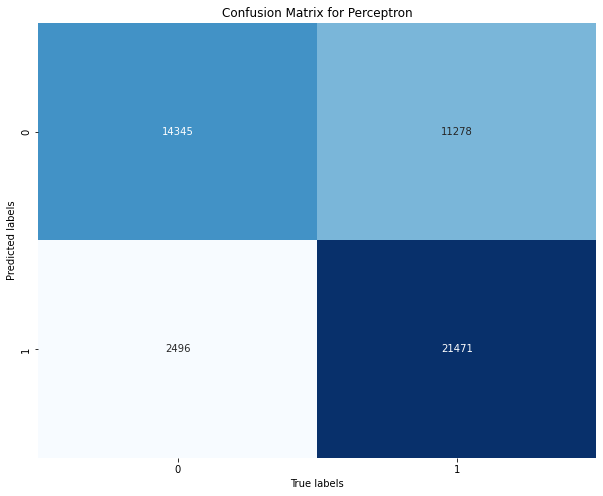

False Positive Percentage: 14.820973%
False Negative Percentage: 34.437693%
True Positive Percentage: 65.562307%
True Negative Percentage: 85.179027%


In [162]:
# Calculation of important metrics for Perceptron
y_pred_per = best_per.predict(X_test[ft_selected])

accuracy = accuracy_score(y_test, y_pred_per)
precision = precision_score(y_test, y_pred_per)
recall = recall_score(y_test, y_pred_per)
f1 = f1_score(y_test, y_pred_per)


print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1 Score: {:.6f}".format(f1))
print("Execution time:", elapsed_time_per, "seconds")

cm_per = confusion_matrix(y_test, y_pred_per)
plt.figure(figsize=(8, 8))
sns.heatmap(cm_per, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.title('Confusion Matrix for Perceptron')
plt.show()

# Getting values for TNs, TPs, FNs, FPs
tn, fn, fp, tp = cm_per.ravel()

false_positive_percentage = (fp / (fp+tn)) * 100
false_negative_percentage = (fn / (fn+tp)) * 100
true_positive_percentage = (tp / (fn+tp)) * 100
true_negative_percentage = (tn / (tn+fp)) * 100

print("False Positive Percentage: {:.6f}%".format(false_positive_percentage))
print("False Negative Percentage: {:.6f}%".format(false_negative_percentage))
print("True Positive Percentage: {:.6f}%".format(true_positive_percentage))
print("True Negative Percentage: {:.6f}%".format(true_negative_percentage))


# Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [164]:
gb = GradientBoostingClassifier()

param_grid_gb = {
    'learning_rate': np.linspace(0.1, 2, 60),
    'n_estimators': [100, 200, 300],
    'max_depth': [15, 20, 25, 30, 35],
    'min_samples_split': [25, 50, 100], 
    'min_samples_leaf': [1, 2], 
}

start_time_gb = time.time()

random_search_gb = RandomizedSearchCV(estimator=gb, param_distributions=param_grid_gb, n_iter=170, cv=3, verbose=0, random_state=29, n_jobs=-1)
random_search_gb.fit(X_train[ft_selected], y_train)

end_time_gb = time.time()
elapsed_time_gb = end_time_gb - start_time_gb


print("Best Parameters:", random_search_gb.best_params_)
print("Execution time:", elapsed_time_gb, "seconds")

best_gb = random_search_gb.best_estimator_
accuracy = best_gb.score(X_test[ft_selected], y_test)
print("Test Accuracy:", accuracy)

KeyboardInterrupt: 

In [70]:
new_ft_selected = ['url_length', 'number_of_dots_in_url', 'number_of_digits_in_url', 'number_of_special_char_in_url', 'number_of_slash_in_url','number_of_questionmark_in_url', 'number_of_equal_in_url', 'domain_length', 'having_digits_in_domain', 'having_repeated_digits_in_domain', 'number_of_subdomains', 'average_subdomain_length','number_of_digits_in_subdomain', 'path_length', 'entropy_of_url', 'entropy_of_domain']

        
gbm_test1 = GradientBoostingClassifier(learning_rate=0.3, n_estimators=120, max_depth=25, min_samples_split=25, min_samples_leaf=1, random_state = 31)
gbm_test1.fit(X_train[new_ft_selected],y_train)
y_pred_gbm_test1 = gbm_test1.predict(X_test[new_ft_selected])
accuracy = accuracy_score(y_test, y_pred_gbm_test1)
print("Accuracy:", accuracy)

Accuracy: 0.9659003831417624


Accuracy: 0.965900
Precision: 0.971430
Recall: 0.957608
F1 Score: 0.964470


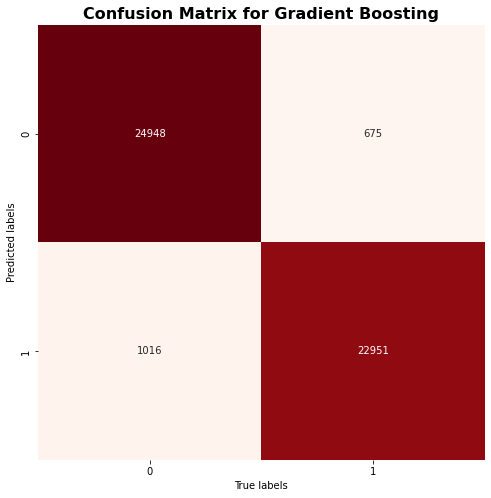

False Positive Percentage: 3.913110%
False Negative Percentage: 2.857022%
True Positive Percentage: 97.142978%
True Negative Percentage: 96.086890%


In [21]:
# Calculation of important metrics for Gradient Boosting

accuracy = accuracy_score(y_test, y_pred_gbm_test1)
precision = precision_score(y_test, y_pred_gbm_test1)
recall = recall_score(y_test, y_pred_gbm_test1)
f1 = f1_score(y_test, y_pred_gbm_test1)


print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1 Score: {:.6f}".format(f1))

cm_gbm = confusion_matrix(y_test, y_pred_gbm_test1)
plt.figure(figsize=(8, 8))
sns.heatmap(cm_gbm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.title('Confusion Matrix for Gradient Boosting', fontsize=16, fontweight='bold')
plt.show()

# Getting values for TNs, TPs, FNs, FPs
tn, fn, fp, tp = cm_gbm.ravel()

false_positive_percentage = (fp / (fp+tn)) * 100
false_negative_percentage = (fn / (fn+tp)) * 100
true_positive_percentage = (tp / (fn+tp)) * 100
true_negative_percentage = (tn / (tn+fp)) * 100

print("False Positive Percentage: {:.6f}%".format(false_positive_percentage))
print("False Negative Percentage: {:.6f}%".format(false_negative_percentage))
print("True Positive Percentage: {:.6f}%".format(true_positive_percentage))
print("True Negative Percentage: {:.6f}%".format(true_negative_percentage))


# Creating an ensemble using the VotingClassifier

In [43]:
from sklearn.ensemble import VotingClassifier

In [45]:
ensembler = VotingClassifier(estimators=[('rf', rf_test1), ('dt', dt_test1), ('gbm', gbm_test1)], voting='hard')

start_time_one = time.time()

ensembler.fit(X_train[ft_selected], y_train)

y_pred_ensembler = ensembler.predict(X_test[ft_selected])

end_time_one = time.time()
elapsed_time_one = end_time_one - start_time_one

accuracy = accuracy_score(y_test, y_pred_ensembler)
print("Ensemble Accuracy:", accuracy)
print("Training time:", elapsed_time_one)




Ensemble Accuracy: 0.9666263359548296
Training time: 366.57408905029297


In [24]:
accuracy = accuracy_score(y_test, y_pred_ensembler)
precision = precision_score(y_test, y_pred_ensembler)
recall = recall_score(y_test, y_pred_ensembler)
f1 = f1_score(y_test, y_pred_ensembler)


print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1 Score: {:.6f}".format(f1))
print("Execution time:", elapsed_time_one, "seconds")

Accuracy: 0.967009
Precision: 0.973295
Recall: 0.958026
F1 Score: 0.965600
Execution time: 478.1763620376587 seconds


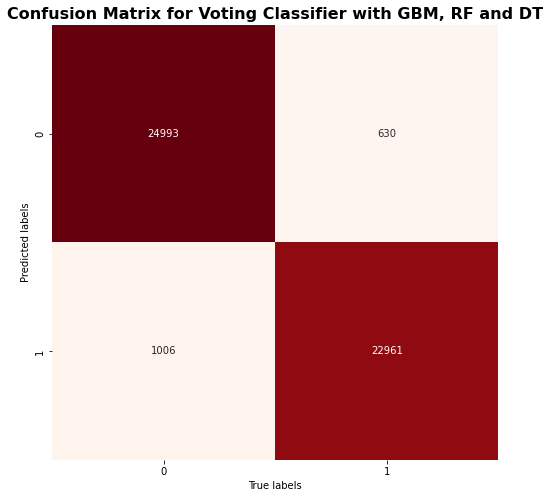

False Positive Percentage: 3.869380%
False Negative Percentage: 2.670510%
True Positive Percentage: 97.329490%
True Negative Percentage: 96.130620%


In [25]:
# Confusion matrix for voting classifier with GBM, RF and DT

cm_one = confusion_matrix(y_test, y_pred_ensembler)
plt.figure(figsize=(8, 8))
sns.heatmap(cm_one, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.title('Confusion Matrix for Voting Classifier with GBM, RF and DT', fontsize=16, fontweight='bold')
plt.show()

# Getting values for TNs, TPs, FNs, FPs
tn, fn, fp, tp = cm_one.ravel()

false_positive_percentage = (fp / (fp+tn)) * 100
false_negative_percentage = (fn / (fn+tp)) * 100
true_positive_percentage = (tp / (fn+tp)) * 100
true_negative_percentage = (tn / (tn+fp)) * 100

print("False Positive Percentage: {:.6f}%".format(false_positive_percentage))
print("False Negative Percentage: {:.6f}%".format(false_negative_percentage))
print("True Positive Percentage: {:.6f}%".format(true_positive_percentage))
print("True Negative Percentage: {:.6f}%".format(true_negative_percentage))


In [49]:
# Ensembler with RF and GBM only
ensembler_two = VotingClassifier(estimators=[('rf', rf_test1), ('gbm', gbm_test1)], voting='hard')

start_time_two = time.time()
ensembler_two.fit(X_train[ft_selected], y_train)

y_pred_ensembler_two = ensembler_two.predict(X_test[ft_selected])

end_time_two = time.time()
elapsed_time_two = end_time_two - start_time_two

accuracy = accuracy_score(y_test, y_pred_ensembler_two)
print("Ensemble Accuracy:", accuracy)
print("Training time:", elapsed_time_two)

Ensemble Accuracy: 0.960879209518048
Training time: 855.7064259052277


In [28]:
accuracy = accuracy_score(y_test, y_pred_ensembler_two)
precision = precision_score(y_test, y_pred_ensembler_two)
recall = recall_score(y_test, y_pred_ensembler_two)
f1 = f1_score(y_test, y_pred_ensembler_two)


print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1 Score: {:.6f}".format(f1))
print("Execution time:", elapsed_time_two, "seconds")

Accuracy: 0.960940
Precision: 0.978455
Recall: 0.939876
F1 Score: 0.958778
Execution time: 473.19710993766785 seconds


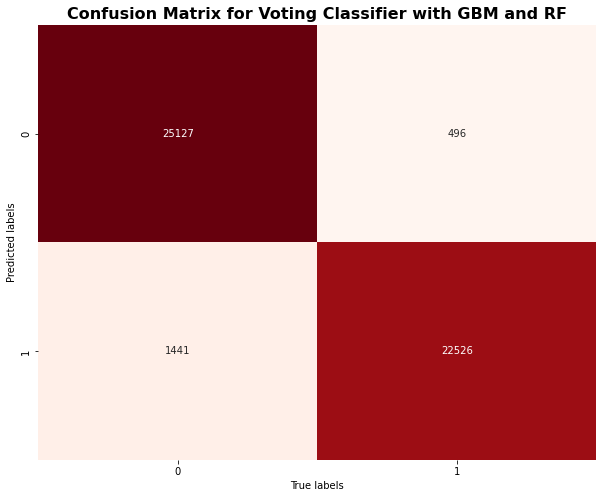

False Positive Percentage: 5.423818%
False Negative Percentage: 2.154461%
True Positive Percentage: 97.845539%
True Negative Percentage: 94.576182%


In [29]:
# Confusion matrix for voting classifier with GMB and RF

cm_two = confusion_matrix(y_test, y_pred_ensembler_two)
plt.figure(figsize=(8, 8))
sns.heatmap(cm_two, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.title('Confusion Matrix for Voting Classifier with GBM and RF', fontsize=16, fontweight='bold')
plt.show()

# Getting values for TNs, TPs, FNs, FPs
tn, fn, fp, tp = cm_two.ravel()

false_positive_percentage = (fp / (fp+tn)) * 100
false_negative_percentage = (fn / (fn+tp)) * 100
true_positive_percentage = (tp / (fn+tp)) * 100
true_negative_percentage = (tn / (tn+fp)) * 100

print("False Positive Percentage: {:.6f}%".format(false_positive_percentage))
print("False Negative Percentage: {:.6f}%".format(false_negative_percentage))
print("True Positive Percentage: {:.6f}%".format(true_positive_percentage))
print("True Negative Percentage: {:.6f}%".format(true_negative_percentage))


## Analysis using SHAP Values for Decision Tree 

In [11]:
import shap 
shap.initjs()

In [ ]:
X_test_new = X_test[new_ft_selected]
explainer = shap.Explainer(dt_test1, X_test_new)
#shapValues_TF = explainer(X_test_new.iloc[0])
shapValues_TF = explainer(X_test_new)

In [266]:
print(shapValues_TF.values.shape)

(49590, 16, 2)


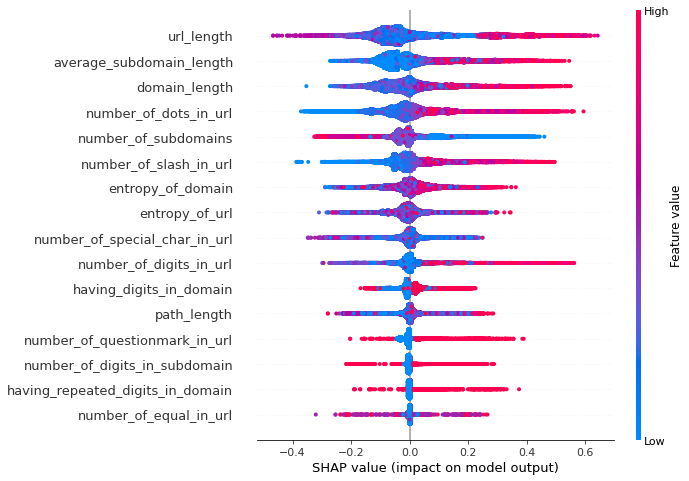

In [268]:
class_index = 1
data_index = 1
shap.plots.beeswarm(shapValues_TF[:,:,class_index],max_display=16)

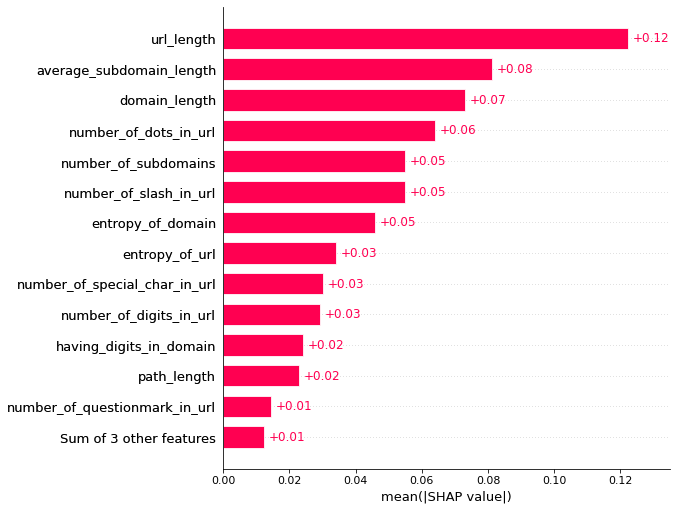

In [276]:
shap.plots.bar(shapValues_TF[:,:,class_index],max_display=14)

## Analysis using SHAP Values for Random Forest

In [57]:
X_test_new = X_test[new_ft_selected]
explainer = shap.Explainer(rf_test1, X_test_new)
shapValues_RF = explainer(X_test_new.iloc[0:1111], check_additivity=False)

100%|===================| 2221/2222 [35:41<00:00]        

In [59]:
shapValues_RF.shape 

(1111, 16, 2)

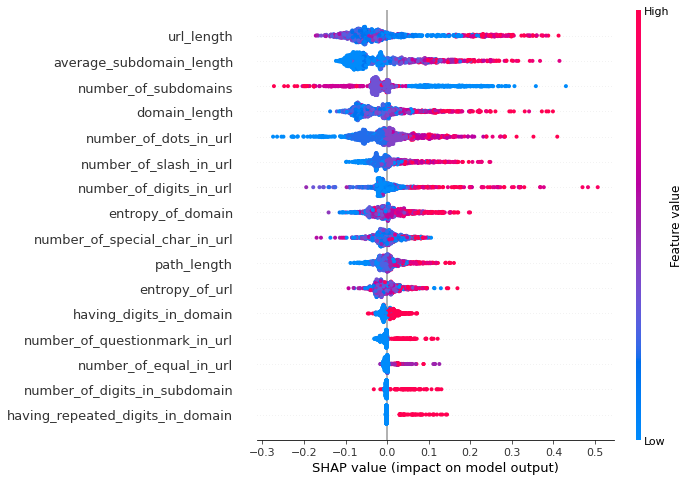

In [63]:
class_index = 1
data_index = 1
shap.plots.beeswarm(shapValues_RF[:,:,class_index] ,max_display=16)

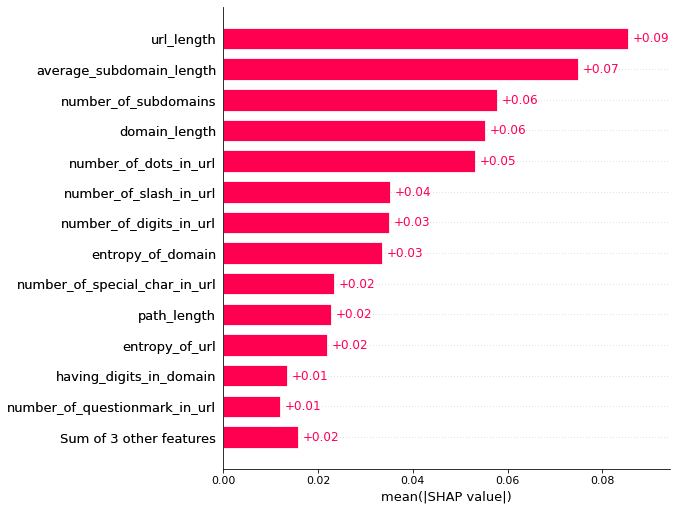

In [65]:
shap.plots.bar(shapValues_RF[:,:,class_index],max_display=14)

## Analysis using SHAP Values for Gradient Boosting

In [116]:
X_test_new = X_test[new_ft_selected]
explainer = shap.Explainer(gbm_test1, X_test_new)
shapValues_GBM = explainer(X_test_new.iloc[0:10000], check_additivity=False)

100%|===================| 9992/10000 [19:20<00:00]        

In [118]:
shapValues_GBM.shape 

(10000, 16)

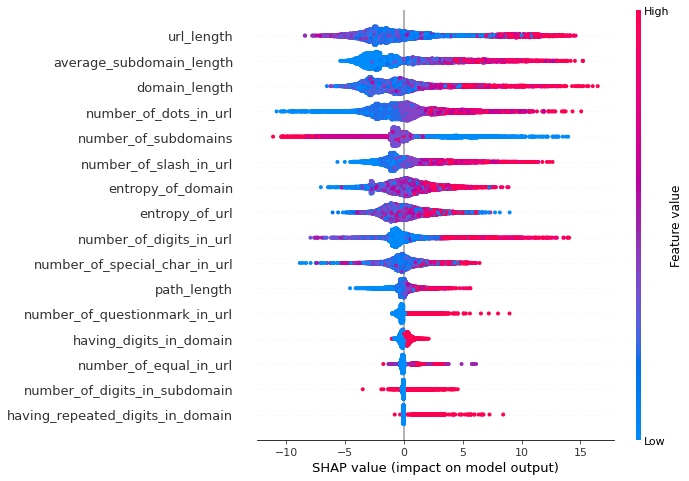

In [120]:
class_index = 1
data_index = 1
shap.plots.beeswarm(shapValues_GBM ,max_display=16)

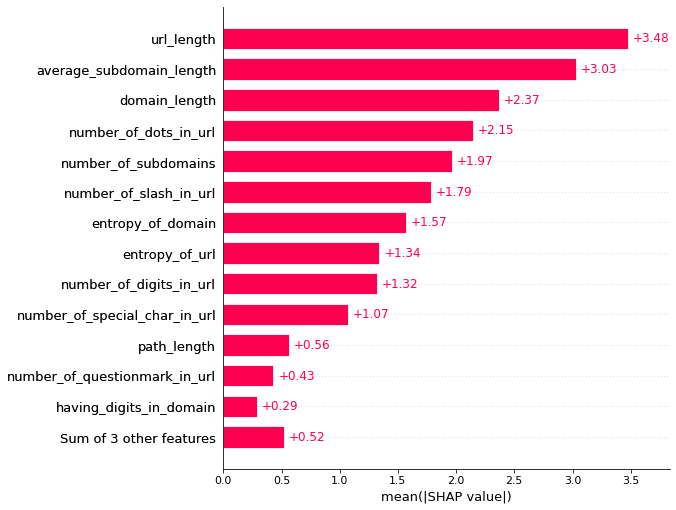

In [122]:
shap.plots.bar(shapValues_GBM,max_display=14)